In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

from MyML import *

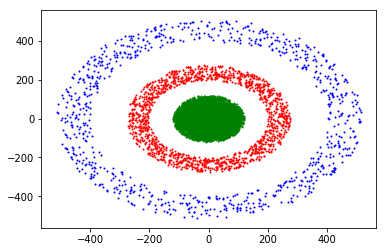

In [2]:
N = 10000
D = 2
scalingFactorRed = 300
scalingFactorGreen = 55
scalingFactorBlue = 700
numPoints = N * D
addedPoints = 0
greenMatrix = np.random.normal(0, scalingFactorGreen, (N, D))
redMatrix = np.random.normal(0, scalingFactorRed, (N,D))
blueMatrix = np.random.normal(0, scalingFactorBlue, (N,D))

def makeDonut(X, lowBound, highBound):
    return np.array(list(filter(lambda x:
                                 x[0]**2+x[1]**2>lowBound**2
                                 and
                                 x[0]**2+x[1]**2<highBound**2, X)))
greenNut = makeDonut(greenMatrix, 0, 120)
redNut = makeDonut(redMatrix, 200, 275)
blueNut = makeDonut(blueMatrix, 400, 515)

plt.figure()
plt.scatter(greenNut[:,0], greenNut[:,1], c='green', s=1)
plt.scatter(redNut[:,0], redNut[:,1], c='red', s=1)
plt.scatter(blueNut[:,0], blueNut[:,1], c='blue', s=1)

In [3]:
print(greenNut.shape, redNut.shape, blueNut.shape)

(9065, 2) (1428, 2) (861, 2)


In [4]:
greenNut = greenNut[0:839,]
redNut = redNut[0:839,]
blueNut = blueNut[0:839,]
print(greenNut.shape, redNut.shape, blueNut.shape)

(839, 2) (839, 2) (839, 2)


In [5]:
yGreen = np.hstack((np.ones((greenNut.shape[0], 1)), np.zeros((greenNut.shape[0], 1)), np.zeros((greenNut.shape[0], 1))))
yRed = np.hstack((np.zeros((redNut.shape[0], 1)), np.ones((redNut.shape[0], 1)), np.zeros((redNut.shape[0], 1))))
yBlue = np.hstack((np.zeros((blueNut.shape[0], 1)), np.zeros((blueNut.shape[0], 1)), np.ones((blueNut.shape[0], 1))))

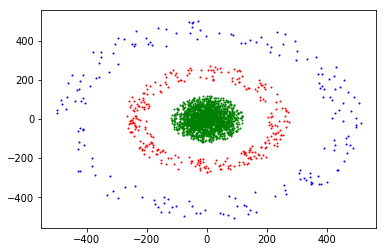

In [6]:
greenValMatrix = np.random.normal(0, scalingFactorGreen, (int(.2*N), D))
redValMatrix = np.random.normal(0, scalingFactorRed, (int(.2*N),D))
blueValMatrix = np.random.normal(0, scalingFactorBlue, (int(.2*N),D))

greenValNut = makeDonut(greenValMatrix, 0, 120)
redValNut = makeDonut(redValMatrix, 200, 275)
blueValNut = makeDonut(blueValMatrix, 400, 515)

plt.figure()
plt.scatter(greenValNut[:,0], greenValNut[:,1], c='green', s=1)
plt.scatter(redValNut[:,0], redValNut[:,1], c='red', s=1)
plt.scatter(blueValNut[:,0], blueValNut[:,1], c='blue', s=1)

In [7]:
print(greenValNut.shape, redValNut.shape, blueValNut.shape)

(1808, 2) (292, 2) (178, 2)


In [8]:
greenValNut = greenValNut[0:177,]
redValNut = redValNut[0:177,]
blueValNut = blueValNut[0:177,]

In [9]:
yGreenVal = np.hstack((np.ones((greenValNut.shape[0], 1)), np.zeros((greenValNut.shape[0], 1)), np.zeros((greenValNut.shape[0], 1))))
yRedVal = np.hstack((np.zeros((redValNut.shape[0], 1)), np.ones((redValNut.shape[0], 1)), np.zeros((redValNut.shape[0], 1))))
yBlueVal = np.hstack((np.zeros((blueValNut.shape[0], 1)), np.zeros((blueValNut.shape[0], 1)), np.ones((blueValNut.shape[0], 1))))

In [10]:
xTrain = np.vstack((greenNut, redNut, blueNut))
yTrain = np.vstack((yGreen, yRed, yBlue))

xValidate = np.vstack((greenValNut, redValNut, blueValNut))
yValidate = np.vstack((yGreenVal, yRedVal, yBlueVal))

In [11]:
fullTrain = np.hstack((xTrain, yTrain))
fullValidate = np.hstack((xValidate, yValidate))
np.random.shuffle(fullTrain)
np.random.shuffle(fullValidate)

In [12]:
for a in range(10):
    np.random.shuffle(fullTrain)
    np.random.shuffle(fullValidate)

In [13]:
xTrain = fullTrain[:,0:2]
yTrain = fullTrain[:,2:5]

xValidate = fullValidate[:,0:2]
yValidate = fullValidate[:,2:5]
#print(xValidate.shape, yValidate.shape)

In [14]:
X = (xTrain - np.min(xTrain))/(np.max(xTrain)-np.min(xTrain))

In [15]:
model = TSNN(indims = 2,nodes = [100,60,3], taskType = 'c')

Weights not previously initialized. Initializing now.


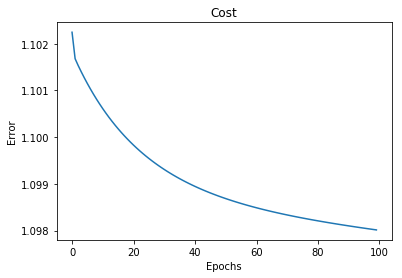

In [16]:
model.train(X,yTrain, lr = .0001)

In [17]:
newmodel = TSNN(indims = 2, nodes = [6,6,3], taskType = 'c')

Weights not previously initialized. Initializing now.


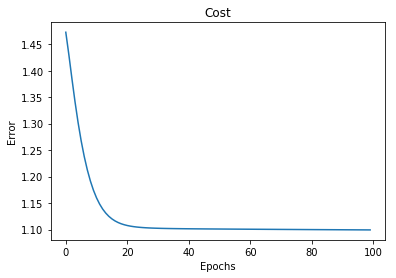

In [18]:
newmodel.train(X,yTrain, mu = .5)

In [19]:
newermodel = TSNN(indims = 2, nodes = [6,6,3], taskType = 'c')

Weights not previously initialized. Initializing now.


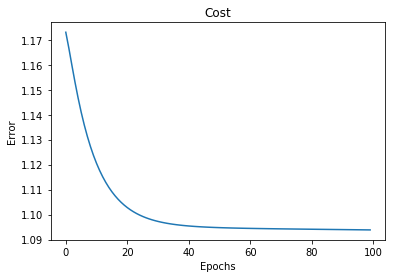

In [20]:
newermodel.train(X,yTrain, mu = .5, T = 20, decay = 'scheduled')

In [21]:
newermodel = TSNN(indims = 2, nodes = [6,6,3], taskType = 'c')

Weights not previously initialized. Initializing now.


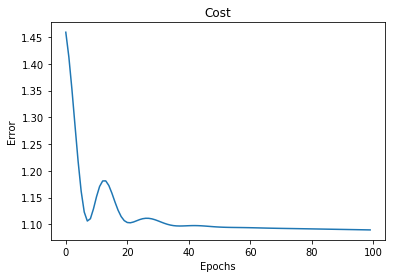

In [22]:
newermodel.train(X,yTrain, mu = .9, T = 20, decay = 'inverse', k = .000001)

In [23]:
accuracy(newermodel.prediction,yTrain)

0.5669447755264203

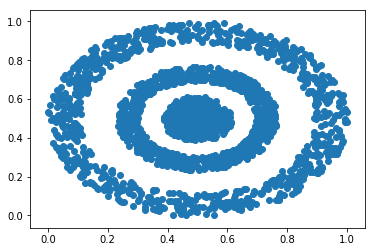

In [24]:
plt.scatter(X[:,0],X[:,1])

In [25]:
yTrain

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])